# MALIGNANT COMMENTS CLASSIFICATION Project

Problem Statement

The proliferation of social media enables people to express their opinions widely online. However, at the same time, 
this has resulted in the emergence of conflict and hate, making online environments uninviting for users. Although researchers
have found that hate is a problem across multiple platforms, there is a lack of models for online hate detection.

Our goal is to build a prototype of online hate and abuse comment classifier which can used to classify hate and offensive
comments so that it can be controlled and restricted from spreading hatred and cyberbullying. 

Data Set Description

The data set contains the training set, which has approximately 1,59,000 samples and the test set which contains nearly 1,53,000
samples. All the data samples contain 8 fields which includes ‘Id’, ‘Comments’, ‘Malignant’, ‘Highly malignant’, ‘Rude’, ‘Threat’
‘Abuse’ and ‘Loathe’. 
The label can be either 0 or 1, where 0 denotes a NO while 1 denotes a YES.There are various comments which have multiple labels 
The first attribute is a unique ID associated with each comment.   

The data set includes:
    
-Malignant: It is the Label column, which includes values 0 and 1, denoting if the comment is malignant or not. 
-Highly Malignant: It denotes comments that are highly malignant and hurtful. 
-Rude: It denotes comments that are very rude and offensive.
-Threat: It contains indication of the comments that are giving any threat to someone. 	
-Abuse: It is for comments that are abusive in nature. 
-Loathe: It describes the comments which are hateful and loathing in nature.  
-ID: It includes unique Ids associated with each comment text given.   
-Comment text: This column contains the comments extracted from various social media platforms.
 


# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import seaborn as sns
import string

In [2]:
df=pd.read_csv("C:/Users/Lenovo/OneDrive/Desktop/Malignant Comments Classifier Project/train.csv")
df

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [6]:
#checking dimension
df.shape

(159571, 8)

In [7]:
df.columns

Index(['id', 'comment_text', 'malignant', 'highly_malignant', 'rude', 'threat',
       'abuse', 'loathe'],
      dtype='object')

In [8]:
df.dtypes#checking types of column

id                  object
comment_text        object
malignant            int64
highly_malignant     int64
rude                 int64
threat               int64
abuse                int64
loathe               int64
dtype: object

In [9]:
df.describe()#About the dataset

,malignant,highly_malignant,rude,threat,abuse,loathe
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Checking Null Values

In [10]:
df.isnull().sum()

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

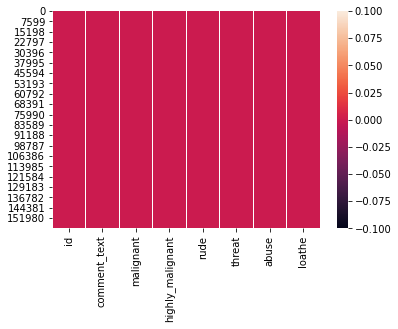

In [11]:
sns.heatmap(df.isnull())

In [12]:
#No null values present in the dataset 

In [13]:
df

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


0    144277
1     15294
Name: malignant, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


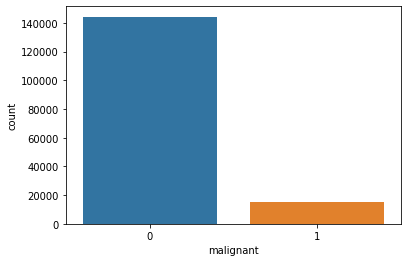

0    157976
1      1595
Name: highly_malignant, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


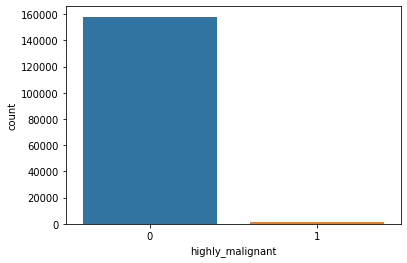

0    151122
1      8449
Name: rude, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


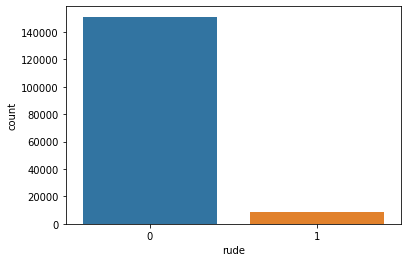

0    159093
1       478
Name: threat, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


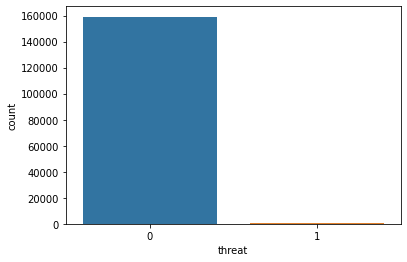

0    151694
1      7877
Name: abuse, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


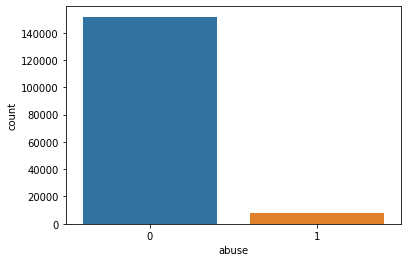

0    158166
1      1405
Name: loathe, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


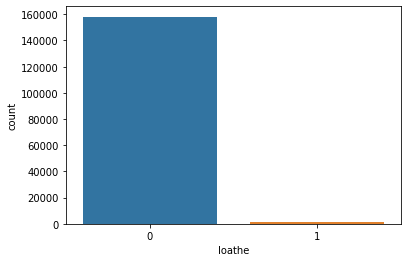

In [14]:
for i in df[['malignant', 'highly_malignant', 'rude', 'threat','abuse', 'loathe']]:
    print(df[i].value_counts())
    sns.countplot(df[i])
    plt.show()

In [15]:
df['len']=df['comment_text'].str.len()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


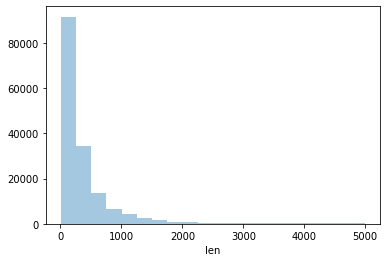

In [16]:
sns.distplot(df['len'], kde=False, bins=20)

In [17]:
train_labels = df[['malignant', 'highly_malignant', 'rude', 'threat',
       'abuse', 'loathe']]
label_count = train_labels.sum()

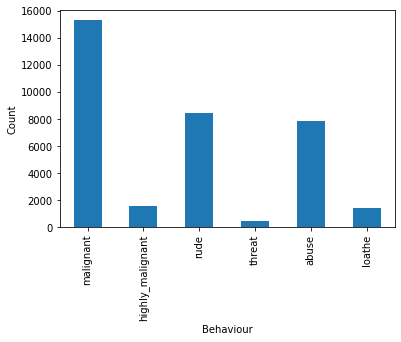

In [18]:
label_count.plot(kind='bar')
plt.xlabel("Behaviour")
plt.ylabel("Count")
plt.show()

In [ ]:
#malignant comment are more  and threat comments are less

In [19]:
#removing noise and repetation of data 
stoplist=['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each',
 'few',
 'more',
 'most',
 'other',
 'some',
 'such',
 'only',
 'own',
 'same',
 'so',
 'than',
 'too',
 'very',
 's',
 't',
 'can',
 'will',
 'just',
 'should',
 "should've",
 'now',
 'd',
 'll',
 'm',
 'o',
 're',
 've',
 'y']

In [20]:
#add some unnecessary words which are present in reviews
stoplist=stoplist+['due','u', 'ü', 'ur', '4', '2', 'im', 'doin', 'ure','since','also']

In [21]:
stoplist

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [22]:
punc=string.punctuation#punctuations
punc

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [23]:
stoplist=set(stoplist)

In [25]:
ps = PorterStemmer()
wordnet=WordNetLemmatizer()
corpus = []#remove noise and punctuation
for i in range(0,159571):
    review = re.sub("[^a-zA-z\s']", ' ', df['comment_text'][i])
    review = review.lower()
    review = review.split() 
    review = [wordnet.lemmatize(word) for word in review if word not in stoplist if word not in punc]
    review = ' '.join(review)
    corpus.append(review)

In [26]:
df['new_comment']=corpus

In [27]:
#new length column after cleaning
df['new_length']=df['new_comment'].str.len()

In [28]:
df

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,len,new_comment,new_length
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,264,explanation edits made username hardcore metal...,168
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,112,d'aww match background colour i'm seemingly st...,73
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,233,hey man i'm really not trying edit war guy con...,149
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,622,can't make real suggestion improvement wondere...,374
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,67,sir hero chance remember page that's,36
...,...,...,...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0,295,second time asking view completely contradicts...,184
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0,99,ashamed horrible thing put talk page,36
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0,81,spitzer umm there no actual article prostituti...,68
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0,116,look like actually put speedy first version de...,56


In [29]:
# Total length removal
print ('Origian Length', df.len.sum())
print ('Clean Length', df.new_length.sum())

Origian Length 62893130
Clean Length 39950428


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

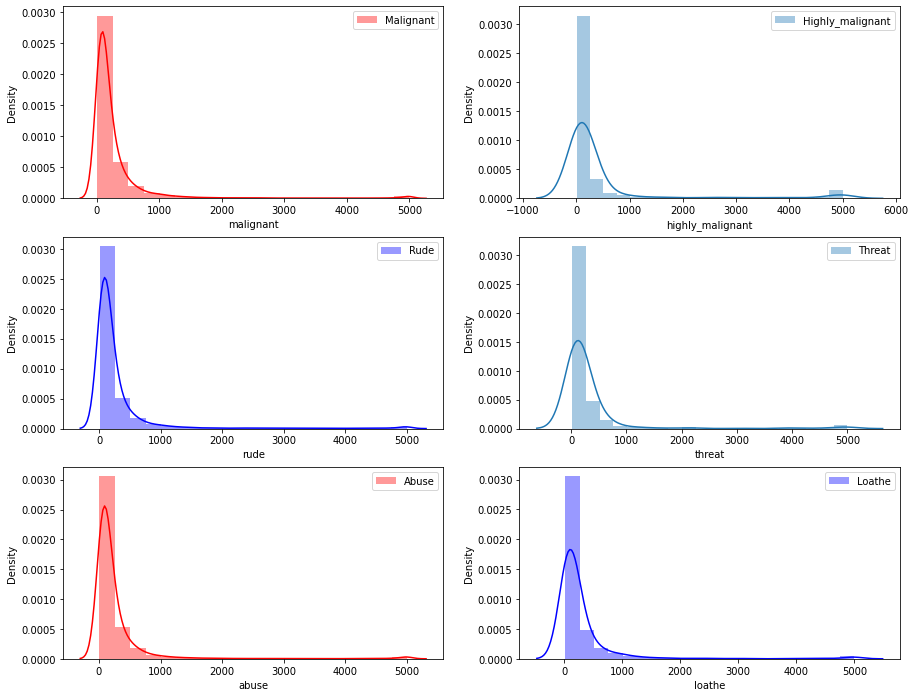

In [30]:
# Message distribution BEFORE cleaning
f,ax = plt.subplots(3,2,figsize = (15,12))

sns.distplot(df[df['malignant']==1]['len'],bins=20,ax=ax[0][0],label='Malignant',color='r')

ax[0][0].set_xlabel('malignant')
ax[0][0].legend()

sns.distplot(df[df['highly_malignant']==1]['len'],bins=20,ax=ax[0][1],label='Highly_malignant')
ax[0][1].set_xlabel('highly_malignant')
ax[0][1].legend()

sns.distplot(df[df['rude']==1]['len'],bins=20,ax=ax[1][0],label='Rude',color='b')

ax[1][0].set_xlabel('rude')
ax[1][0].legend()

sns.distplot(df[df['threat']==1]['len'],bins=20,ax=ax[1][1],label='Threat')
ax[1][1].set_xlabel('threat')
ax[1][1].legend()
sns.distplot(df[df['abuse']==1]['len'],bins=20,ax=ax[2][0],label='Abuse',color='r')

ax[2][0].set_xlabel('abuse')
ax[2][0].legend()

sns.distplot(df[df['loathe']==1]['len'],bins=20,ax=ax[2][1],label='Loathe',color='b')

ax[2][1].set_xlabel('loathe')
ax[2][1].legend()

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

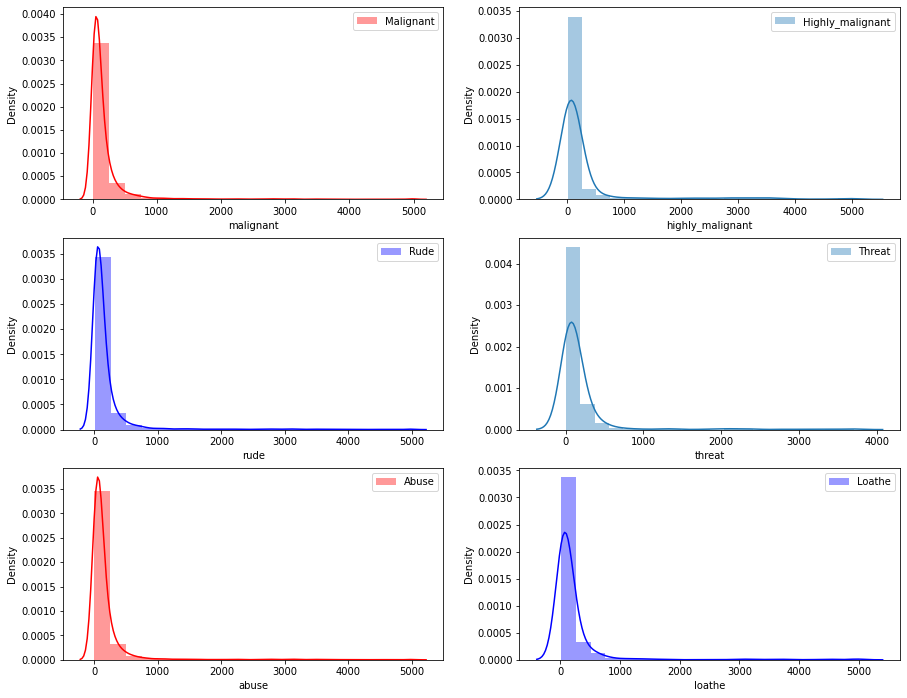

In [31]:
# Message distribution after cleaning
f,ax = plt.subplots(3,2,figsize = (15,12))

sns.distplot(df[df['malignant']==1]['new_length'],bins=20,ax=ax[0][0],label='Malignant',color='r')

ax[0][0].set_xlabel('malignant')
ax[0][0].legend()

sns.distplot(df[df['highly_malignant']==1]['new_length'],bins=20,ax=ax[0][1],label='Highly_malignant')
ax[0][1].set_xlabel('highly_malignant')
ax[0][1].legend()

sns.distplot(df[df['rude']==1]['new_length'],bins=20,ax=ax[1][0],label='Rude',color='b')

ax[1][0].set_xlabel('rude')
ax[1][0].legend()

sns.distplot(df[df['threat']==1]['new_length'],bins=20,ax=ax[1][1],label='Threat')
ax[1][1].set_xlabel('threat')
ax[1][1].legend()
sns.distplot(df[df['abuse']==1]['new_length'],bins=20,ax=ax[2][0],label='Abuse',color='r')

ax[2][0].set_xlabel('abuse')
ax[2][0].legend()

sns.distplot(df[df['loathe']==1]['new_length'],bins=20,ax=ax[2][1],label='Loathe',color='b')

ax[2][1].set_xlabel('loathe')
ax[2][1].legend()

plt.show()

In [32]:
df=df[df['len']<400]

In [33]:
# Total length removal
print ('Origian Length', df.len.sum())
print ('Clean Length', df.new_length.sum())

Origian Length 18478594
Clean Length 11564120


In [34]:
df=df.drop(['id','comment_text','len','new_length'],axis=1)

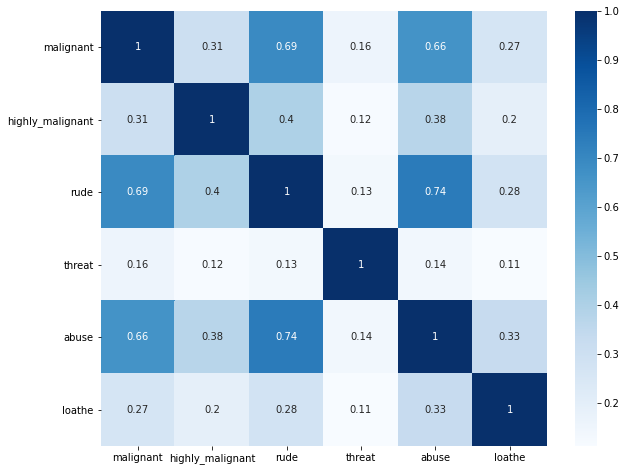

In [35]:

corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True, cmap="Blues")

In [36]:
df.head(10)

,malignant,highly_malignant,rude,threat,abuse,loathe,new_comment
0,0,0,0,0,0,0,explanation edits made username hardcore metal...
1,0,0,0,0,0,0,d'aww match background colour i'm seemingly st...
2,0,0,0,0,0,0,hey man i'm really not trying edit war guy con...
4,0,0,0,0,0,0,sir hero chance remember page that's
5,0,0,0,0,0,0,congratulation well use tool well talk
6,1,1,1,0,1,0,cocksucker piss around work
7,0,0,0,0,0,0,vandalism matt shirvington article reverted pl...
9,0,0,0,0,0,0,alignment subject contrary dulithgow
11,0,0,0,0,0,0,bbq man let discus maybe phone
12,1,0,0,0,0,0,hey talk exclusive group wp taliban good destr...


In [4]:
#divide in independent and dependent features

In [42]:
x = df["new_comment"]
y = np.asarray(df[df.columns[0:6]])

In [43]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, random_state=42, test_size=0.20, shuffle=True)

In [44]:
#converting text to vectors
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=3000,strip_accents='unicode', analyzer='word', ngram_range=(1,3), norm='l2')
vectorizer.fit(x)
x_train = vectorizer.transform(x_train)
x_test = vectorizer.transform(x_test)


In [46]:
from skmultilearn.adapt import MLkNN
from sklearn.metrics import accuracy_score,classification_report

In [47]:
mlknn_classifier = MLkNN()
mlknn_classifier.fit(x_train, y_train)

MLkNN(ignore_first_neighbours=0, k=10, s=1.0)

In [48]:
y_pred = mlknn_classifier.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred))) 
print('Test classification report is {}'.format(classification_report(y_test,y_pred))) 

Test accuracy is 0.8845323430348044
Test classification report is               precision    recall  f1-score   support

           0       0.78      0.31      0.44      2592
           1       0.60      0.11      0.19       264
           2       0.73      0.37      0.49      1464
           3       0.50      0.10      0.16        72
           4       0.65      0.35      0.46      1396
           5       0.60      0.10      0.18       254

   micro avg       0.72      0.31      0.44      6042
   macro avg       0.64      0.22      0.32      6042
weighted avg       0.72      0.31      0.43      6042
 samples avg       0.03      0.03      0.03      6042



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [49]:
# using binary relevance
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB
# initialize binary relevance multi-label classifier
# with a gaussian naive bayes base classifier
classifier = BinaryRelevance(GaussianNB())
# train
classifier.fit(x_train, y_train)
# predict
y_pred = classifier.predict(x_test)
# accuracy
print("Accuracy = ",accuracy_score(y_test,y_pred))
print('Test classification report is {}'.format(classification_report(y_test,y_pred))) 


Accuracy =  0.33141894809569045
Test classification report is               precision    recall  f1-score   support

           0       0.18      0.94      0.30      2592
           1       0.04      0.68      0.08       264
           2       0.11      0.91      0.19      1464
           3       0.01      0.44      0.03        72
           4       0.10      0.91      0.18      1396
           5       0.03      0.65      0.06       254

   micro avg       0.11      0.90      0.19      6042
   macro avg       0.08      0.75      0.14      6042
weighted avg       0.13      0.90      0.23      6042
 samples avg       0.06      0.10      0.07      6042



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [50]:
# using classifier chains
from skmultilearn.problem_transform import ClassifierChain
from sklearn.linear_model import LogisticRegression

In [51]:
# initialize classifier chains multi-label classifier
classifier = ClassifierChain(LogisticRegression())
# Training logistic regression model on train data
classifier.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


ClassifierChain(classifier=LogisticRegression(C=1.0, class_weight=None,
                                              dual=False, fit_intercept=True,
                                              intercept_scaling=1,
                                              l1_ratio=None, max_iter=100,
                                              multi_class='auto', n_jobs=None,
                                              penalty='l2', random_state=None,
                                              solver='lbfgs', tol=0.0001,
                                              verbose=0, warm_start=False),
                order=None, require_dense=[True, True])

In [52]:
# predict
y_pred= classifier.predict(x_test)
# accuracy
print("Accuracy = ",accuracy_score(y_test,y_pred))
print('Test classification report is {}'.format(classification_report(y_test,y_pred))) 

Accuracy =  0.9100094999568183
Test classification report is               precision    recall  f1-score   support

           0       0.92      0.63      0.75      2592
           1       0.52      0.21      0.30       264
           2       0.89      0.71      0.79      1464
           3       0.67      0.17      0.27        72
           4       0.74      0.63      0.68      1396
           5       0.68      0.20      0.32       254

   micro avg       0.85      0.61      0.71      6042
   macro avg       0.74      0.43      0.52      6042
weighted avg       0.84      0.61      0.70      6042
 samples avg       0.06      0.06      0.06      6042



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [53]:
# using Label Powerset
from skmultilearn.problem_transform import LabelPowerset
# initialize label powerset multi-label classifier

In [55]:
classifier2 = LabelPowerset(LogisticRegression())
# train
classifier2.fit(x_train, y_train)
# predict
y_pred = classifier2.predict(x_test)
# accuracy
print("Accuracy = ",accuracy_score(y_test,y_pred))
print('Test classification report is {}'.format(classification_report(y_test,y_pred))) 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy =  0.9069004231798946
Test classification report is               precision    recall  f1-score   support

           0       0.94      0.57      0.71      2592
           1       0.42      0.11      0.18       264
           2       0.90      0.64      0.75      1464
           3       0.55      0.08      0.14        72
           4       0.78      0.54      0.63      1396
           5       0.70      0.15      0.25       254

   micro avg       0.87      0.53      0.66      6042
   macro avg       0.71      0.35      0.44      6042
weighted avg       0.86      0.53      0.65      6042
 samples avg       0.06      0.05      0.05      6042



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#multi-label classifier is the best model for this dataset.

Loading Test Dataset

In [3]:
df1=pd.read_csv("C:/Users/Lenovo/OneDrive/Desktop/Malignant Comments Classifier Project/test.csv")
df1

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu..."
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ..."
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the..."


In [133]:
df1=df1.drop("id",axis=1)#drop id column
df1

,comment_text
0,Yo bitch Ja Rule is more succesful then you'll...
1,== From RfC == \n\n The title is fine as it is...
2,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,":If you have a look back at the source, the in..."
4,I don't anonymously edit articles at all.
...,...
153159,". \n i totally agree, this stuff is nothing bu..."
153160,== Throw from out field to home plate. == \n\n...
153161,""" \n\n == Okinotorishima categories == \n\n I ..."
153162,""" \n\n == """"One of the founding nations of the..."


In [134]:
df1.shape#checking dimension

(153164, 1)

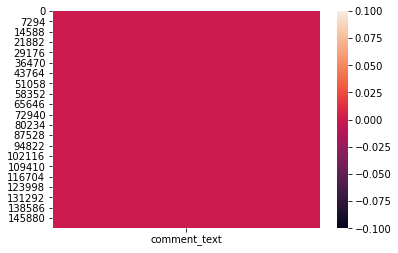

In [135]:
sns.heatmap(df1.isnull())#checking null values

In [136]:
#Data preprocessing
wordnet=WordNetLemmatizer()
corpus = []#remove noise and punctuation
for i in range(0,153164):
    review = re.sub("[^a-zA-z\s']", ' ', df1['comment_text'][i])
    review = review.lower()
    review = review.split() 
    review = [wordnet.lemmatize(word) for word in review if word not in stoplist if word not in punc]
    review = ' '.join(review)
    corpus.append(review)

In [137]:
df1['new_comment']=corpus

In [138]:
#new length column after cleaning
df1['new_length']=df1['new_comment'].str.len()

In [139]:
df1['len']=df1['comment_text'].str.len()

In [140]:
df1

,comment_text,new_comment,new_length,len
0,Yo bitch Ja Rule is more succesful then you'll...,yo bitch ja rule succesful ever whats hating s...,232,367
1,== From RfC == \n\n The title is fine as it is...,rfc title fine imo,18,50
2,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...",source zawe ashton lapland,26,54
3,":If you have a look back at the source, the in...",look back source information updated correct f...,116,205
4,I don't anonymously edit articles at all.,don't anonymously edit article,30,41
...,...,...,...,...
153159,". \n i totally agree, this stuff is nothing bu...",totally agree stuff nothing long crap,37,60
153160,== Throw from out field to home plate. == \n\n...,throw field home plate get faster throwing cut...,107,198
153161,""" \n\n == Okinotorishima categories == \n\n I ...",okinotorishima category see change agree corre...,246,423
153162,""" \n\n == """"One of the founding nations of the...",one founding nation eu germany law return quit...,337,502


In [141]:
# Total length removal
print ('Origian Length', df1.len.sum())
print ('Clean Length', df1.new_length.sum())

Origian Length 55885733
Clean Length 35013681


In [142]:
df1=df1[df1['len']<400]#remove long text
df1

,comment_text,new_comment,new_length,len
0,Yo bitch Ja Rule is more succesful then you'll...,yo bitch ja rule succesful ever whats hating s...,232,367
1,== From RfC == \n\n The title is fine as it is...,rfc title fine imo,18,50
2,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...",source zawe ashton lapland,26,54
3,":If you have a look back at the source, the in...",look back source information updated correct f...,116,205
4,I don't anonymously edit articles at all.,don't anonymously edit article,30,41
...,...,...,...,...
153157,:Disagree. Soviet railways need their own arti...,disagree soviet railway need article administe...,191,255
153158,This idiot can't even use proper grammar when ...,idiot can't even use proper grammar hijacking ...,50,63
153159,". \n i totally agree, this stuff is nothing bu...",totally agree stuff nothing long crap,37,60
153160,== Throw from out field to home plate. == \n\n...,throw field home plate get faster throwing cut...,107,198


In [145]:
df1=df1.reset_index()
df1=df1.drop("index",axis=1)
df1

,comment_text,new_comment,new_length,len
0,Yo bitch Ja Rule is more succesful then you'll...,yo bitch ja rule succesful ever whats hating s...,232,367
1,== From RfC == \n\n The title is fine as it is...,rfc title fine imo,18,50
2,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...",source zawe ashton lapland,26,54
3,":If you have a look back at the source, the in...",look back source information updated correct f...,116,205
4,I don't anonymously edit articles at all.,don't anonymously edit article,30,41
...,...,...,...,...
115673,:Disagree. Soviet railways need their own arti...,disagree soviet railway need article administe...,191,255
115674,This idiot can't even use proper grammar when ...,idiot can't even use proper grammar hijacking ...,50,63
115675,". \n i totally agree, this stuff is nothing bu...",totally agree stuff nothing long crap,37,60
115676,== Throw from out field to home plate. == \n\n...,throw field home plate get faster throwing cut...,107,198


In [146]:
df4=df1

In [147]:
df1=df1.drop(['comment_text','len','new_length'],axis=1)#drop unwanted columns
df1

,new_comment
0,yo bitch ja rule succesful ever whats hating s...
1,rfc title fine imo
2,source zawe ashton lapland
3,look back source information updated correct f...
4,don't anonymously edit article
...,...
115673,disagree soviet railway need article administe...
115674,idiot can't even use proper grammar hijacking ...
115675,totally agree stuff nothing long crap
115676,throw field home plate get faster throwing cut...


In [148]:
x=df1['new_comment']


In [150]:
#converting text to vectors
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=3000,strip_accents='unicode', analyzer='word', ngram_range=(1,3), norm='l2')
x=vectorizer.fit_transform(x)

In [151]:
y_pred = classifier.predict(x)#prediction
y_pred

<115678x6 sparse matrix of type '<class 'numpy.float64'>'
	with 6933 stored elements in Compressed Sparse Column format>

In [152]:
df2=pd.DataFrame(y_pred.toarray())#making dataframe
df2

,0,1,2,3,4,5
0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
115673,0.0,0.0,0.0,0.0,0.0,0.0
115674,0.0,0.0,0.0,0.0,0.0,0.0
115675,0.0,0.0,0.0,0.0,0.0,0.0
115676,0.0,0.0,0.0,0.0,0.0,0.0


In [156]:
df3=pd.concat([df4['comment_text'],df2],axis=1)
df3

,comment_text,0,1,2,3,4,5
0,Yo bitch Ja Rule is more succesful then you'll...,0.0,0.0,0.0,0.0,0.0,0.0
1,== From RfC == \n\n The title is fine as it is...,0.0,0.0,0.0,0.0,0.0,0.0
2,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...",0.0,0.0,0.0,0.0,0.0,0.0
3,":If you have a look back at the source, the in...",0.0,0.0,0.0,0.0,0.0,0.0
4,I don't anonymously edit articles at all.,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
115673,:Disagree. Soviet railways need their own arti...,0.0,0.0,0.0,0.0,0.0,0.0
115674,This idiot can't even use proper grammar when ...,0.0,0.0,0.0,0.0,0.0,0.0
115675,". \n i totally agree, this stuff is nothing bu...",0.0,0.0,0.0,0.0,0.0,0.0
115676,== Throw from out field to home plate. == \n\n...,0.0,0.0,0.0,0.0,0.0,0.0


In [157]:
df3.to_csv("prediction.csv")

In [ ]:
#Saving model
import pickle
pickle.dump(classifier,"classifierchain.obj")